# Création du dataset

In [ ]:
import numpy as np
import pandas as pd
from scipy.sparse.linalg import svds # SVD
import tensorflow as tf # NMF
import seaborn as sns

In [ ]:
ratings_df = pd.read_csv("ratings.csv",sep=",")
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [ ]:
movies_df = pd.read_csv("movies.csv",sep=",")
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
movies_df.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


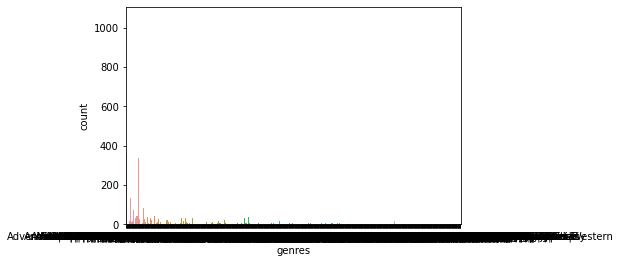

In [ ]:
sns.countplot(x='genres',data=movies_df)

In [ ]:
genre_proportion = movies_df['genres'].value_counts(normalize = True)
genre_a_supprimer = []

for genre in movies_df['genres'].unique() :
  if genre_proportion[genre] < 0.005 :
    genre_a_supprimer.append(genre)

genre_proportion[genre_a_supprimer].sum()

0.435228905768836

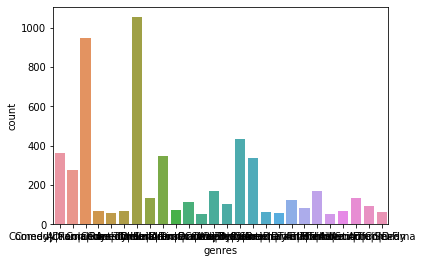

In [ ]:
df = movies_df.drop(movies_df[movies_df['genres'].isin(genre_a_supprimer)].index, axis=0)
ax=sns.countplot(x='genres',data=df)

In [ ]:
df = df.reset_index(drop=True)
df

,movieId,title,genres
0,3,Grumpier Old Men (1995),Comedy|Romance
1,4,Waiting to Exhale (1995),Comedy|Drama|Romance
2,5,Father of the Bride Part II (1995),Comedy
3,6,Heat (1995),Action|Crime|Thriller
4,7,Sabrina (1995),Comedy|Romance
...,...,...,...
5497,190221,Hommage à Zgougou (et salut à Sabine Mamou) (2...,Documentary
5498,193571,Silver Spoon (2014),Comedy|Drama
5499,193579,Jon Stewart Has Left the Building (2015),Documentary
5500,193585,Flint (2017),Drama


In [ ]:
sports = ['Football',
       'Basketball', 'Rubgy', 'Tennis', 'Ping-Pong', 'Volleyball', 'Handball',
       'Baseball', 'Hockey', 'Boxe', 'Badminton', 'Water Polo', 'Judo', 'Karate',
       'Taekwondo', 'Judo', 'Cricket', 'Escrime', 'Basket 3x3']

In [ ]:
len(df.genres.unique())

26

In [ ]:
g = [np.random.choice(df.genres.unique()) for i in range(19)] 

In [ ]:
g

['Action|Crime|Thriller',
 'Documentary',
 'Horror|Sci-Fi',
 'Action|Thriller',
 'Action|Adventure|Sci-Fi',
 'Drama|Thriller',
 'Horror|Thriller',
 'Comedy|Romance',
 'Crime|Drama',
 'Horror|Sci-Fi',
 'Drama',
 'Drama',
 'Action|Crime|Thriller',
 'Comedy|Romance',
 'Action',
 'Drama|Romance',
 'Action|Crime|Drama',
 'Comedy|Romance',
 'Comedy']

In [ ]:
len(g)

19

In [ ]:
sports_df = df.copy()
s_df = sports_df.loc[sports_df['genres'].isin(g)]

In [ ]:
len(s_df.genres.unique())

13

In [ ]:
mg = []
for i in s_df.genres.unique():
  mg.append(i)

new_sports = []
for i in range(len(s_df.genres.unique())):
  new_sports.append(sports[i])

In [ ]:
s_df = s_df.replace(mg, new_sports)

In [ ]:
s_df = s_df.reset_index(drop=True)

In [ ]:
s_df

,movieId,title,genres
0,4,Waiting to Exhale (1995),Football
1,9,Sudden Death (1995),Basketball
2,11,"American President, The (1995)",Football
3,14,Nixon (1995),Rubgy
4,26,Othello (1995),Rubgy
...,...,...,...
2663,190213,John From (2015),Rubgy
2664,190215,Liquid Truth (2017),Rubgy
2665,190221,Hommage à Zgougou (et salut à Sabine Mamou) (2...,Baseball
2666,193579,Jon Stewart Has Left the Building (2015),Baseball


In [ ]:
l = []
for i in new_sports :
  s = []
  s.append(i)
  s.append(len(s_df[s_df.genres == i]))
  l.append(s)

In [ ]:
l

[['Football', 276],
 ['Basketball', 60],
 ['Rubgy', 1053],
 ['Tennis', 114],
 ['Ping-Pong', 50],
 ['Volleyball', 168],
 ['Handball', 101],
 ['Baseball', 339],
 ['Hockey', 61],
 ['Boxe', 60],
 ['Badminton', 84],
 ['Water Polo', 167],
 ['Judo', 135]]

In [ ]:
def teams(l,numb):
  eq = [np.random.randint(1,20) for i in range(l[numb][1])]
  return eq

In [ ]:
def teams_name(l,numb):
  eq = [np.random.randint(1,20) for i in range(l[numb][1])]
  for j in range(len(eq)):
    eq[j] = l[numb][0][0:4] + str(eq[j])
  return eq

In [ ]:
eq_f = teams(l, 0)
eq_b = teams(l, 1)
eq_r = teams(l, 2)
eq_t = teams(l, 3)
eq_p = teams(l, 4)
eq_v = teams(l, 5)
eq_h = teams(l, 6)
eq_ba = teams(l, 7)
eq_ho = teams(l, 8)
eq_bo = teams(l, 9)
eq_bad = teams(l, 10)
eq_w = teams(l, 11)
eq_j = teams(l, 12)

In [ ]:
eq_b

In [ ]:
team_1 = np.zeros((len(s_df),), dtype=float)
team_2 = np.zeros((len(s_df),), dtype=float)

In [ ]:
team_1 = pd.DataFrame (data = team_1)
s_df['team_1'] = team_1

team_2 = pd.DataFrame (data = team_2)
s_df['team_2'] = team_2

In [ ]:
s_df

,movieId,title,genres,team_1,team_2
0,4,Waiting to Exhale (1995),Football,0.0,0.0
1,9,Sudden Death (1995),Basketball,0.0,0.0
2,11,"American President, The (1995)",Football,0.0,0.0
3,14,Nixon (1995),Rubgy,0.0,0.0
4,26,Othello (1995),Rubgy,0.0,0.0
...,...,...,...,...,...
2663,190213,John From (2015),Rubgy,0.0,0.0
2664,190215,Liquid Truth (2017),Rubgy,0.0,0.0
2665,190221,Hommage à Zgougou (et salut à Sabine Mamou) (2...,Baseball,0.0,0.0
2666,193579,Jon Stewart Has Left the Building (2015),Baseball,0.0,0.0


In [ ]:
def make_teams(data, sport, eq):
  for i in range(len(data)):
    numb = []
    if data.genres[i] == sport:
      numb = [np.random.choice(eq) for i in range(2)]
      data.team_1[i] = numb[0]
      data.team_2[i] = numb[1]
  return data

In [ ]:
s_df = make_teams(s_df, 'Football', eq_f)
s_df = make_teams(s_df, 'Basketball', eq_b)
s_df = make_teams(s_df, 'Rubgy', eq_r)
s_df = make_teams(s_df, 'Tennis', eq_t)
s_df = make_teams(s_df, 'Ping-Pong', eq_p)
s_df = make_teams(s_df, 'Volleyball', eq_v)
s_df = make_teams(s_df, 'Handball', eq_h)
s_df = make_teams(s_df, 'Baseball', eq_ba)
s_df = make_teams(s_df, 'Hockey', eq_ho)
s_df = make_teams(s_df, 'Boxe', eq_bo)
s_df = make_teams(s_df, 'Badminton', eq_bad)
s_df = make_teams(s_df, 'Water Polo', eq_w)
s_df = make_teams(s_df, 'Judo', eq_j)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
s_df.drop('title', axis=1, inplace=True)

In [ ]:
s_df

,movieId,genres,team_1,team_2
0,4,Football,5.0,8.0
1,9,Basketball,3.0,18.0
2,11,Football,8.0,1.0
3,14,Rubgy,15.0,12.0
4,26,Rubgy,18.0,3.0
...,...,...,...,...
2663,190213,Rubgy,15.0,13.0
2664,190215,Rubgy,11.0,12.0
2665,190221,Baseball,18.0,6.0
2666,193579,Baseball,12.0,17.0


In [ ]:
s_df = s_df.reset_index(drop=True)

In [ ]:
s_df_clean = s_df.copy()
for i in range(len(s_df_clean)):
  if s_df_clean.team_1[i] == s_df_clean.team_2[i]:
    s_df_clean = s_df_clean.drop(i)

In [ ]:
s_df_clean = s_df_clean.reset_index(drop=True)

In [ ]:
s_df_clean

,movieId,genres,team_1,team_2
0,4,Football,5.0,8.0
1,9,Basketball,3.0,18.0
2,11,Football,8.0,1.0
3,14,Rubgy,15.0,12.0
4,26,Rubgy,18.0,3.0
...,...,...,...,...
2521,190213,Rubgy,15.0,13.0
2522,190215,Rubgy,11.0,12.0
2523,190221,Baseball,18.0,6.0
2524,193579,Baseball,12.0,17.0


In [ ]:
r = ratings_df.copy()
r = ratings_df.loc[ratings_df['movieId'].isin(s_df_clean['movieId'])]

In [ ]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [ ]:
r.describe()

,userId,movieId,rating,timestamp
count,16697.000000,16697.000000,16697.000000,1.669700e+04
mean,332.822004,19456.480146,3.558004,1.192111e+09
std,183.047299,36117.474168,1.002739,2.131006e+08
min,1.000000,4.000000,0.500000,8.281246e+08
25%,182.000000,1246.000000,3.000000,1.002403e+09
50%,339.000000,3247.000000,4.000000,1.171832e+09
75%,477.000000,8014.000000,4.000000,1.415714e+09
max,610.000000,193585.000000,5.000000,1.537799e+09


In [ ]:
r = r.reset_index(drop=True)

In [ ]:
r.head()

,userId,movieId,rating,timestamp
0,1,349,4.0,964982563
1,1,423,3.0,964982363
2,1,457,5.0,964981909
3,1,527,5.0,964984002
4,1,954,5.0,964983219


In [ ]:
len(r)

16697

In [ ]:
for j in range(len(r)):
  for i in range(len(s_df_clean)):
    if s_df_clean._get_value(i, 'movieId') == r._get_value(j, 'movieId'):
      rand = np.random.randint(2)
      if rand == 0:
        r.rating[j] = s_df_clean.team_1[i]
      else:
        r.rating[j] = s_df_clean.team_2[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
r

,userId,movieId,rating,timestamp
0,1,349,13.0,964982563
1,1,423,18.0,964982363
2,1,457,2.0,964981909
3,1,527,16.0,964984002
4,1,954,11.0,964983219
...,...,...,...,...
16692,610,160571,12.0,1493848537
16693,610,161634,19.0,1493848362
16694,610,163981,16.0,1493850155
16695,610,168250,2.0,1494273047


In [ ]:
r.columns = ['userId', 'matchId', 'pari', 'timestamp']

In [ ]:
s_df_clean.columns = ['matchId', 'sport', 'team_1', 'team_2']

In [ ]:
r['pari'] = r.pari.astype("str")
s_df_clean['sport'] = s_df_clean.sport.astype("str")

In [ ]:
r.head()

,userId,matchId,pari,timestamp
0,1,349,13.0,964982563
1,1,423,18.0,964982363
2,1,457,2.0,964981909
3,1,527,16.0,964984002
4,1,954,11.0,964983219


In [ ]:
s_df_clean.head()

,matchId,sport,team_1,team_2
0,4,Football,5.0,8.0
1,9,Basketball,3.0,18.0
2,11,Football,8.0,1.0
3,14,Rubgy,15.0,12.0
4,26,Rubgy,18.0,3.0


In [ ]:
s_df_clean.to_csv('matchs.csv', encoding='utf-8', index = False)

In [ ]:
r.to_csv('paris.csv', encoding='utf-8', index = False)